# HandsON-Dr. Semmelweis and the Discovery of Handwashing

## Task 1

Load in the dataset with the yearly number of deaths.
- Import the pandas module.
- Read in datasets/yearly_deaths_by_clinic.csv and assign it to the variable yearly.
- Print out yearly.

In [1]:
import pandas as pd

In [2]:
yearly = pd.read_csv('yearly_deaths_by_clinic.csv')
yearly.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


## Task 2

Calculate the yearly proportion of deaths.
- Calculate the proportion of deaths per number of births and store the result in the new column yearly["proportion_deaths"].
- Extract the rows from clinic 1 into yearly1 and the rows from clinic 2 into yearly2.
- Print out yearly1.

In [3]:
yearly['proportion_deaths'] = yearly['deaths']/yearly['births']

In [4]:
yearly1 = yearly[yearly['clinic']=='clinic 1']

In [5]:
yearly2 = yearly[yearly['clinic']=='clinic 2']

In [6]:
yearly1

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542
3,1844,3157,260,clinic 1,0.082357
4,1845,3492,241,clinic 1,0.069015
5,1846,4010,459,clinic 1,0.114464


## Task 3

Plot the yearly proportion of deaths for both clinics.
- Plot proportion_deaths by year for the two clinics in a single plot. Use the DataFrame plot method.
- Label the plotted lines using the label argument to plot.
- Save the Axes object returned by the plot method into the variable ax.
- Change the y-axis label to "Proportion deaths".

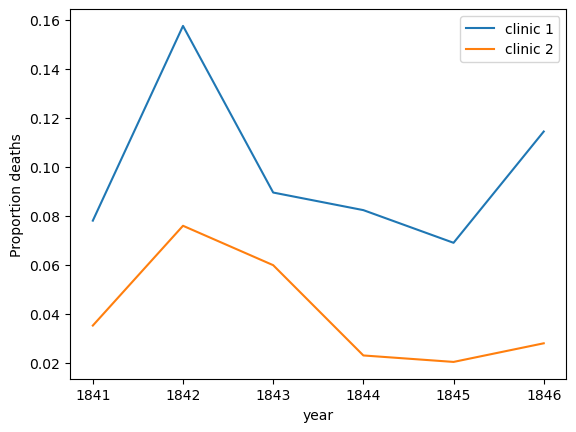

In [7]:
ax = yearly1.plot(x='year', y='proportion_deaths', label='clinic 1')
yearly2.plot(x='year', y='proportion_deaths', label='clinic 2', ax=ax)
ax.set_ylabel('Proportion deaths');

## Task 4

Load in the dataset with the monthly number of deaths for Clinic 1.
- Read in datasets/monthly_deaths.csv and assign it to the variable monthly. Make sure to tell read_csv to parse the date column as a date.
- Calculate the proportion of deaths per number of births and store the result in the new column monthly["proportion_deaths"].
- Print out the first rows in monthly using the head() method.

In [8]:
monthly = pd.read_csv('monthly_deaths.csv', parse_dates=['date'])
monthly

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [9]:
monthly['proportion_deaths'] = monthly['deaths']/monthly['births']

In [10]:
monthly.head(1)

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669


## Task 5

Plot the monthly proportion of deaths for Clinic 1.
- Plot proportion_deaths by date for the monthly date using the DataFrame plot method.
- Save the Axes object returned by the plot method into the variable ax.
- Change the y-axis label to "Proportion deaths"

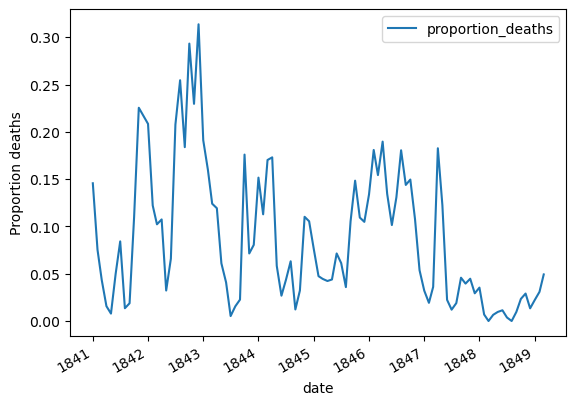

In [11]:
ax = monthly.plot(x='date',y='proportion_deaths')
ax.set_ylabel('Proportion deaths');

## Task 6

Make a plot that highlights the effect of handwashing.
- Split monthly into before_washing (the rows in monthly before handwashing_start) and after_washing (the rows in monthly at and after handwashing_start).
- Plot proportion_deaths in before_washing and after_washing into the same plot. Use the DataFrame plot method.
- Label the plotted lines using the label argument to plot.
- Save the Axes object returned by the plot method into the variable ax.
- Change the y-axis label to "Proportion deaths".

In [12]:
handwashing_start = '1847-06-01'

In [13]:
before_washing = monthly[monthly['date']<handwashing_start]
after_washing = monthly[monthly['date']>=handwashing_start]

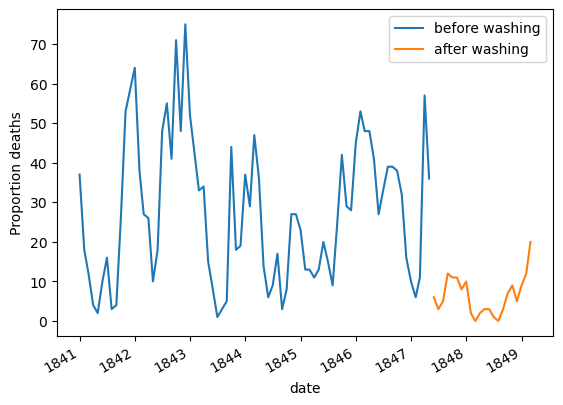

In [14]:
ax = before_washing.plot(x='date', y='deaths', label='before washing')
after_washing.plot(x='date', y='deaths', label='after washing',ax=ax)
ax.set_ylabel('Proportion deaths');

## Task 7

Calculate the average reduction in proportion of deaths due to handwashing.
- Select the column proportion_deaths in before_washing and put it into before_proportion.
- Do the same for proportion_deaths in after_washing and put it into after_proportion.
- Calculate the difference in mean monthly proportion of deaths as mean after_proportion minus mean before_proportion.

In [15]:
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']

In [16]:
mean_difference = after_proportion.mean() - before_proportion.mean()
mean_difference

-0.08395660751183336

## Task 8

Make a bootstrap analysis of the difference in mean monthly proportion of deaths.
- boot_before and boot_after should be sampled with replacement from before_proportion and after_proportion.
- Append 3000 bootstrapped differences in means to boot_mean_diff.
- Calculate a 95% confidence_interval as the 2.5% and 97.5% quantiles of boot_mean_diff.

In [17]:
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

In [18]:
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
print(confidence_interval)

0.025   -0.100981
0.975   -0.067211
dtype: float64


## Task 9

- Given the data Semmelweis collected, is it True or False that doctors should wash their hands?

In [19]:
doctors_should_wash_their_hands = True